In [403]:
import sys
print(sys.version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [404]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]


In [405]:
def SubjFolderSearch(path):
    subjFolders = os.listdir(path)
    AllFolders = []
    for i in subjFolders:
        if '.DS_Store' not in i:
            AllFolders.append(i)
    
    AllFolders_dict = {}
    for eachFolder in AllFolders:
        eachFolderPath = os.path.join(path,eachFolder)
        folderContents = os.listdir(eachFolderPath)
        AllFolders_dict[eachFolder] = [file for file in folderContents if '.set' in file]
       
        
    return AllFolders_dict

In [406]:
path = '/Volumes/flash64/EEGLAB'
AllSetFiles = SubjFolderSearch(path)
print(AllSetFiles)

{'SA20131216': ['20131216_1310.set', '20131216_1441.set'], 'SA20140205': ['20140205_1114.set', '20140205_1230.set'], 'SA20140206': ['20140206_1029.set', '20140206_1151.set'], 'SA20140207': ['20140207_1146.set', '20140207_1219.set'], 'SA20140217': ['20140217_1136.set']}


In [407]:
# read file
np.random.seed(42)
eeglab_dict_keys = list(eeglab_dict.keys())
eeglab_folder = os.path.join(path,eeglab_dict_keys[1])

eeglab_file = os.path.join(eeglab_folder, eeglab_dict[eeglab_dict_keys[1]][1])
raw = mne.io.read_raw_eeglab(eeglab_file, preload=True, verbose = True)

Reading /Volumes/flash64/EEGLAB/SA20140205/20140205_1230.fdt
Reading 0 ... 838231  =      0.000 ...  1637.170 secs...


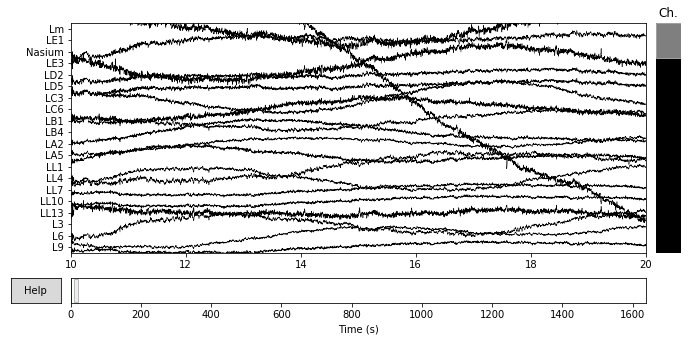

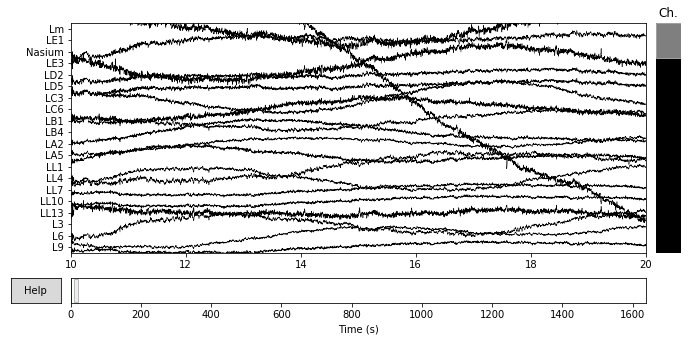

In [408]:
raw.plot(n_channels=20,duration=10,start=10)

In [409]:
rawTwentySec = raw.copy()

In [410]:
rawTwentySec.crop(0,20)

<RawEEGLAB  |  20140205_1230.fdt, n_channels x n_times : 129 x 10241 (20.0 sec), ~10.4 MB, data loaded>

In [411]:
#filter to reject 60 Hz power line noise
rawTwentySec.notch_filter(np.arange(60,241,60))

Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected


<RawEEGLAB  |  20140205_1230.fdt, n_channels x n_times : 129 x 10241 (20.0 sec), ~10.4 MB, data loaded>

In [414]:
rawTwentySec.filter(l_freq=10, h_freq=50,fir_design='firwin')

Setting up band-pass filter from 10 - 50 Hz
l_trans_bandwidth chosen to be 2.5 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 677 samples (1.322 sec) selected


<RawEEGLAB  |  20140205_1230.fdt, n_channels x n_times : 129 x 10241 (20.0 sec), ~10.4 MB, data loaded>

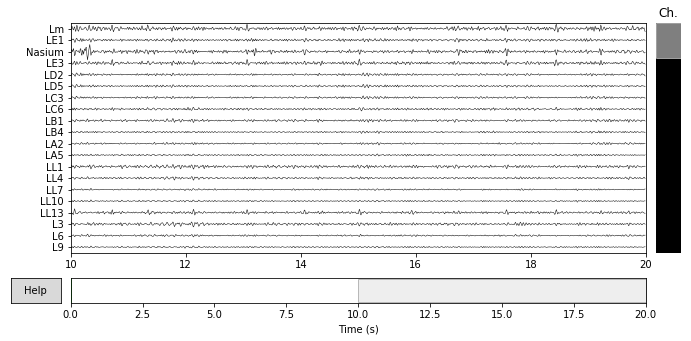

In [415]:
rawTwentySec.plot(n_channels= 20, duration=10,start=10);